In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('MY1995-2023 Fuel Consumption Ratings 5-cycle.csv', encoding='latin1')

In [5]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,Smog RATING
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232,NaN,NaN
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225,NaN,NaN
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223,NaN,NaN
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288,NaN,NaN
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299,NaN,NaN


In [6]:
df.isnull().sum()

YEAR                                    0
MAKE                                    0
MODEL                                   0
VEHICLE CLASS                           0
ENGINE SIZE (L)                         0
CYLINDERS                               0
TRANSMISSION                            0
FUEL TYPE                               0
FUEL CONSUMPTION CITY (L/100 km)        0
FUEL CONSUMPTION HWY (L/100 km)         0
FUEL CONSUMPTION COMB (L/100 km)        0
FUEL CONSUMPTION COMB (mpg)             0
CO2 EMISSIONS (g/km)                    0
CO2 RATING                          18991
Smog RATING                         20101
dtype: int64

In [7]:
df.shape

(27052, 15)

In [8]:
df.duplicated().sum()

3

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27052 entries, 0 to 27051
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   YEAR                              27052 non-null  int64  
 1   MAKE                              27052 non-null  object 
 2   MODEL                             27052 non-null  object 
 3   VEHICLE CLASS                     27052 non-null  object 
 4   ENGINE SIZE (L)                   27052 non-null  float64
 5   CYLINDERS                         27052 non-null  int64  
 6   TRANSMISSION                      27052 non-null  object 
 7   FUEL TYPE                         27052 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  27052 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100 km)   27052 non-null  float64
 10  FUEL CONSUMPTION COMB (L/100 km)  27052 non-null  float64
 11  FUEL CONSUMPTION COMB (mpg)       27052 non-null  int64  
 12  CO2 

In [10]:
df.describe()

,YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,Smog RATING
count,27052.000000,27052.000000,27052.000000,27052.000000,27052.000000,27052.000000,27052.000000,27052.000000,8061.000000,6951.000000
mean,2010.023510,3.347050,5.836796,13.840844,10.010428,12.117274,24.932907,275.535155,4.640739,4.751259
std,7.950154,1.342093,1.803439,3.741765,2.588809,3.185538,6.729091,65.865680,1.603253,1.788972
min,1995.000000,0.800000,2.000000,4.000000,3.900000,4.000000,10.000000,94.000000,1.000000,1.000000
25%,2004.000000,2.300000,4.000000,11.300000,8.200000,9.900000,20.000000,230.000000,4.000000,3.000000
50%,2010.000000,3.000000,6.000000,13.400000,9.500000,11.600000,24.000000,268.000000,5.000000,5.000000
75%,2017.000000,4.200000,8.000000,15.900000,11.400000,13.900000,29.000000,315.000000,6.000000,6.000000
max,2023.000000,8.400000,16.000000,33.300000,22.100000,27.500000,71.000000,633.000000,10.000000,8.000000


In [11]:
df["MAKE"].nunique()

90

In [12]:
df["MAKE"].unique()

array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'EAGLE', 'FERRARI',
       'FORD', 'GEO', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'JAGUAR', 'JEEP', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH',
       'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'DAEWOO', 'KIA',
       'MASERATI', 'MINI', 'MITSUBISHI', 'SMART', 'HUMMER',
       'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI', 'SCION', 'FIAT', 'RAM',
       'SRT', 'GENESIS', 'Acura', 'Alfa Romeo', 'Aston Martin', 'Audi',
       'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Dodge', 'Ford', 'Genesis', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Porsche',

We can see that some car makes are identical but one is spelled in uppercase letters and the other is spelled with only the first letter capitalized and the rest in lowercase. Hence, we need to make sure that these are treated the same. To do that, all values in 'MAKE' will be converted to uppercase.  

In [13]:
df['MAKE'] = df['MAKE'].str.upper()

In [14]:
df["MAKE"].unique()

array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'EAGLE', 'FERRARI',
       'FORD', 'GEO', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'JAGUAR', 'JEEP', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH',
       'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'DAEWOO', 'KIA',
       'MASERATI', 'MINI', 'MITSUBISHI', 'SMART', 'HUMMER',
       'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI', 'SCION', 'FIAT', 'RAM',
       'SRT', 'GENESIS'], dtype=object)

In [15]:
df["MAKE"].nunique()

55

Now, we have all car makes in uppercase. There are 55 unique car makes. 

Let's look at the top 25 car makes with the most models:

In [16]:
df['VEHICLE CLASS'].unique()

array(['SUBCOMPACT', 'COMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL',
       'MINICOMPACT', 'MID-SIZE', 'FULL-SIZE', 'STATION WAGON - MID-SIZE',
       'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SUV',
       'MINIVAN', 'PICKUP TRUCK - SMALL', 'UL', 'SPECIAL PURPOSE VEHICLE',
       'SUV - SMALL', 'SUV - STANDARD', 'Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

In [17]:
df['VEHICLE CLASS'].nunique()

33

In [18]:
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.upper()

In [19]:
df['VEHICLE CLASS'].unique()

array(['SUBCOMPACT', 'COMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL',
       'MINICOMPACT', 'MID-SIZE', 'FULL-SIZE', 'STATION WAGON - MID-SIZE',
       'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SUV',
       'MINIVAN', 'PICKUP TRUCK - SMALL', 'UL', 'SPECIAL PURPOSE VEHICLE',
       'SUV - SMALL', 'SUV - STANDARD', 'SUV: SMALL',
       'STATION WAGON: SMALL', 'SUV: STANDARD', 'PICKUP TRUCK: SMALL',
       'PICKUP TRUCK: STANDARD', 'VAN: PASSENGER',
       'STATION WAGON: MID-SIZE'], dtype=object)

In [20]:
df['VEHICLE CLASS'].nunique()

25

We can see that some vehicle class names are identical, but have been listed slightly differently. For example:
SUV - SMALL and SUV: SMALL
SUV - STANDARD and SUV: STANDARD
STATION WAGON - SMALL and STATION WAGON: SMALL
STATION WAGON - MID-SIZE and STATION WAGON: MID-SIZE
PICKUP TRUCK - SMALL and PICKUP TRUCK: SMALL
PICKUP TRUCK - STANDARD and PICKUP TRUCK: STANDARD
VAN - PASSENGER and VAN: PASSENGER

Let's make sure that these are fixed to reflect the same

In [21]:
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('SUV: SMALL', 'SUV - SMALL')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('SUV: STANDARD', 'SUV - STANDARD')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('STATION WAGON: SMALL', 'STATION WAGON - SMALL')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('STATION WAGON: MID-SIZE', 'STATION WAGON - MID-SIZE')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('PICKUP TRUCK: SMALL', 'PICKUP TRUCK - SMALL')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('PICKUP TRUCK: STANDARD', 'PICKUP TRUCK - STANDARD')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('VAN: PASSENGER', 'VAN - PASSENGER')


In [22]:
df['VEHICLE CLASS'].unique()

array(['SUBCOMPACT', 'COMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL',
       'MINICOMPACT', 'MID-SIZE', 'FULL-SIZE', 'STATION WAGON - MID-SIZE',
       'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SUV',
       'MINIVAN', 'PICKUP TRUCK - SMALL', 'UL', 'SPECIAL PURPOSE VEHICLE',
       'SUV - SMALL', 'SUV - STANDARD'], dtype=object)

In [23]:
df['VEHICLE CLASS'].nunique()

18

In [24]:
df_Make=df['MAKE'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})[0:25]
df_Make

,MAKE,count
0,CHEVROLET,2554
1,FORD,2202
2,BMW,1672
3,GMC,1638
4,MERCEDES-BENZ,1424
5,DODGE,1256
6,TOYOTA,1233
7,PORSCHE,1031
8,AUDI,926
9,VOLKSWAGEN,917


In [25]:
df_Make=df['MAKE'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})[0:25]
df_Make
fig = go.Figure(go.Bar(
    x=df_Make['MAKE'],y=df_Make['count'],
    marker={'color': df_Make['count'], 
    'colorscale': 'Viridis'},  
    text=df_Make['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 25 Companies',xaxis_title="Vehicle Make",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()


In [26]:
df_v_class=df['VEHICLE CLASS'].value_counts().reset_index().rename(columns={'index':'Vehicle Class','Vehicle Class':'Count'})[0:25]
df_v_class
fig = go.Figure(go.Bar(
    x=df_v_class['VEHICLE CLASS'],y=df["CO2 EMISSIONS (g/km)"],
    marker={'color': df_v_class['count'], 
    'colorscale': 'Viridis'},  
    text=df["CO2 EMISSIONS (g/km)"],
    textposition = "outside",
))
fig.update_layout(title_text='CO2 vs Vehicle Class',xaxis_title="Vehicle Class ",yaxis_title="Total CO2 Emissions ",title_x=0.5)
fig.show()

In [28]:
df.isna().sum()

YEAR                                    0
MAKE                                    0
MODEL                                   0
VEHICLE CLASS                           0
ENGINE SIZE (L)                         0
CYLINDERS                               0
TRANSMISSION                            0
FUEL TYPE                               0
FUEL CONSUMPTION CITY (L/100 km)        0
FUEL CONSUMPTION HWY (L/100 km)         0
FUEL CONSUMPTION COMB (L/100 km)        0
FUEL CONSUMPTION COMB (mpg)             0
CO2 EMISSIONS (g/km)                    0
CO2 RATING                          18991
Smog RATING                         20101
dtype: int64

Let's explore how 

In [32]:
# Assuming df is your DataFrame

# Group by 'Vehicle Class' and calculate the sum of 'CO2 Emissions(g/km)'
df_v_class = df.groupby('VEHICLE CLASS')['CO2 EMISSIONS (g/km)'].sum().reset_index()

# Sort the DataFrame by 'CO2 Emissions(g/km)' in descending order
df_v_class = df_v_class.sort_values(by='CO2 EMISSIONS (g/km)', ascending=False)

# Create the bar chart
fig = go.Figure(go.Bar(
    x=df_v_class['VEHICLE CLASS'],
    y=df_v_class['CO2 EMISSIONS (g/km)'],
    marker={'color': df_v_class['CO2 EMISSIONS (g/km)'], 'colorscale': 'Viridis'},
    text=df_v_class['CO2 EMISSIONS (g/km)'],
    textposition="outside",
))

# Update layout
fig.update_layout(
    title_text='CO2 vs Vehicle Class',
    xaxis_title="Vehicle Class",
    yaxis_title="Total CO2 Emissions",
    title_x=0.5
)

# Show the figure
fig.show()


Let's compare the counts of different cars with fuel types available from 1995 - 2023

In [37]:
df['CYLINDERS'].value_counts()

CYLINDERS
4     9707
6     9675
8     6167
5      591
12     506
3      194
10     180
2       17
16      15
Name: count, dtype: int64

In [50]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,Smog RATING
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232,NaN,NaN
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225,NaN,NaN
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223,NaN,NaN
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288,NaN,NaN
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299,NaN,NaN


In [52]:
import plotly.graph_objects as go

# Assuming df is your DataFrame

# Get the value counts of 'CYLINDERS'
cylinders_counts = df['CYLINDERS'].value_counts().reset_index()

# Create the bar chart
fig = go.Figure(go.Bar(
    x=cylinders_counts.iloc[:, 0],  # Access the first column (index column) using iloc
    y=cylinders_counts['CYLINDERS'],
    marker={'color': cylinders_counts['CYLINDERS'], 'colorscale': 'Viridis'},
    text=cylinders_counts['CYLINDERS'],
    textposition="outside",
))

# Update layout
fig.update_layout(
    title_text='Cylinder Counts',
    xaxis_title="Cylinders",
    yaxis_title="Count",
    title_x=0.5
)

# Show the figure
fig.show()

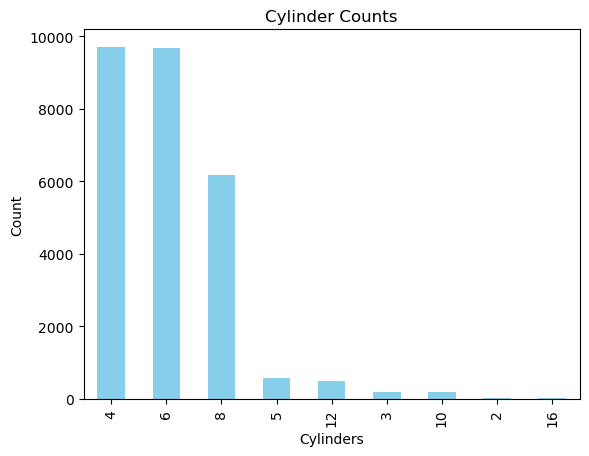

In [53]:
cylinders_counts = df['CYLINDERS'].value_counts()

# Create a bar plot
cylinders_counts.plot(kind='bar', color='skyblue')

# Set plot labels
plt.title('Cylinder Counts')
plt.xlabel('Cylinders')
plt.ylabel('Count')

# Show the plot
plt.show()

Now, let's look at the count of vehicles and the respective number of cylinders. This will give us a breakdown of the cylinders of the vehicle models.

In [54]:
cylinders_counts = df['CYLINDERS'].value_counts()

# Create the bar chart with hovertext
fig = go.Figure(go.Bar(
    x=cylinders_counts.index,
    y=cylinders_counts.values,
    marker={'color': cylinders_counts.values, 'colorscale': 'Viridis'},
    text=cylinders_counts.values,
    hovertext=[f'Cylinders: {count}' for count in cylinders_counts.values],  # Hovertext
))

# Update layout
fig.update_layout(
    title_text='Cylinder Counts',
    xaxis_title="Cylinders",
    yaxis_title="Count",
    title_x=0.5
)

We can see from the above that most vehicle models have 4 and 6 cylinders, followed by 8 cylinders.

Next, let's calculate the mean fuel consumption for city, highway, and combined. In addition, let's calculate the mean CO2 emissions for each car make. 

The mean is an appropriate metric since we have many car brands, each of which has their own models that may be less or more than other car brands. 